In [1]:
import pickle
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FILE_NAME = "data_2022-08-11_18-35-34.pkl"

In [3]:
def read_file(file_path: str):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data
    

In [4]:
data = read_file("test_data/" + FILE_NAME)

In [5]:
def transform_data_to_df(data):
    data_transformed = {ts: pd.Series({str(idx): value for idx, value in np.ndenumerate(value_matrix)}) for ts, value_matrix in data.items()}
    df = pd.DataFrame.from_dict(data_transformed, orient='index')
    df = df.melt(ignore_index=False, var_name='matrix_idx')
    df.index.name = 'ts'
    df.reset_index(inplace= True)
    return df

df = transform_data_to_df(data)
df

,ts,matrix_idx,value
0,2022-08-11 18:34:45.055926,"(0, 0)",523.0
1,2022-08-11 18:34:45.067031,"(0, 0)",523.0
2,2022-08-11 18:34:45.077768,"(0, 0)",523.0
3,2022-08-11 18:34:45.088357,"(0, 0)",523.0
4,2022-08-11 18:34:45.098840,"(0, 0)",523.0
...,...,...,...
164995,2022-08-11 18:35:34.087946,"(2, 10)",0.0
164996,2022-08-11 18:35:34.097446,"(2, 10)",0.0
164997,2022-08-11 18:35:34.106871,"(2, 10)",0.0
164998,2022-08-11 18:35:34.120000,"(2, 10)",0.0


<AxesSubplot:xlabel='ts', ylabel='value'>

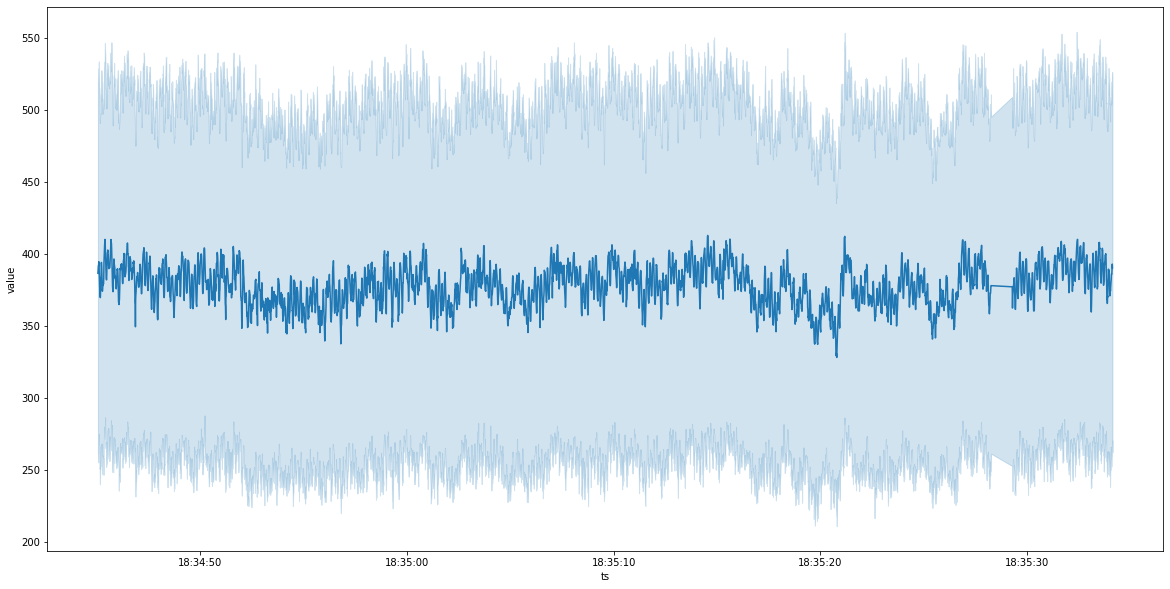

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(ax=ax, data=df, x='ts', y='value')

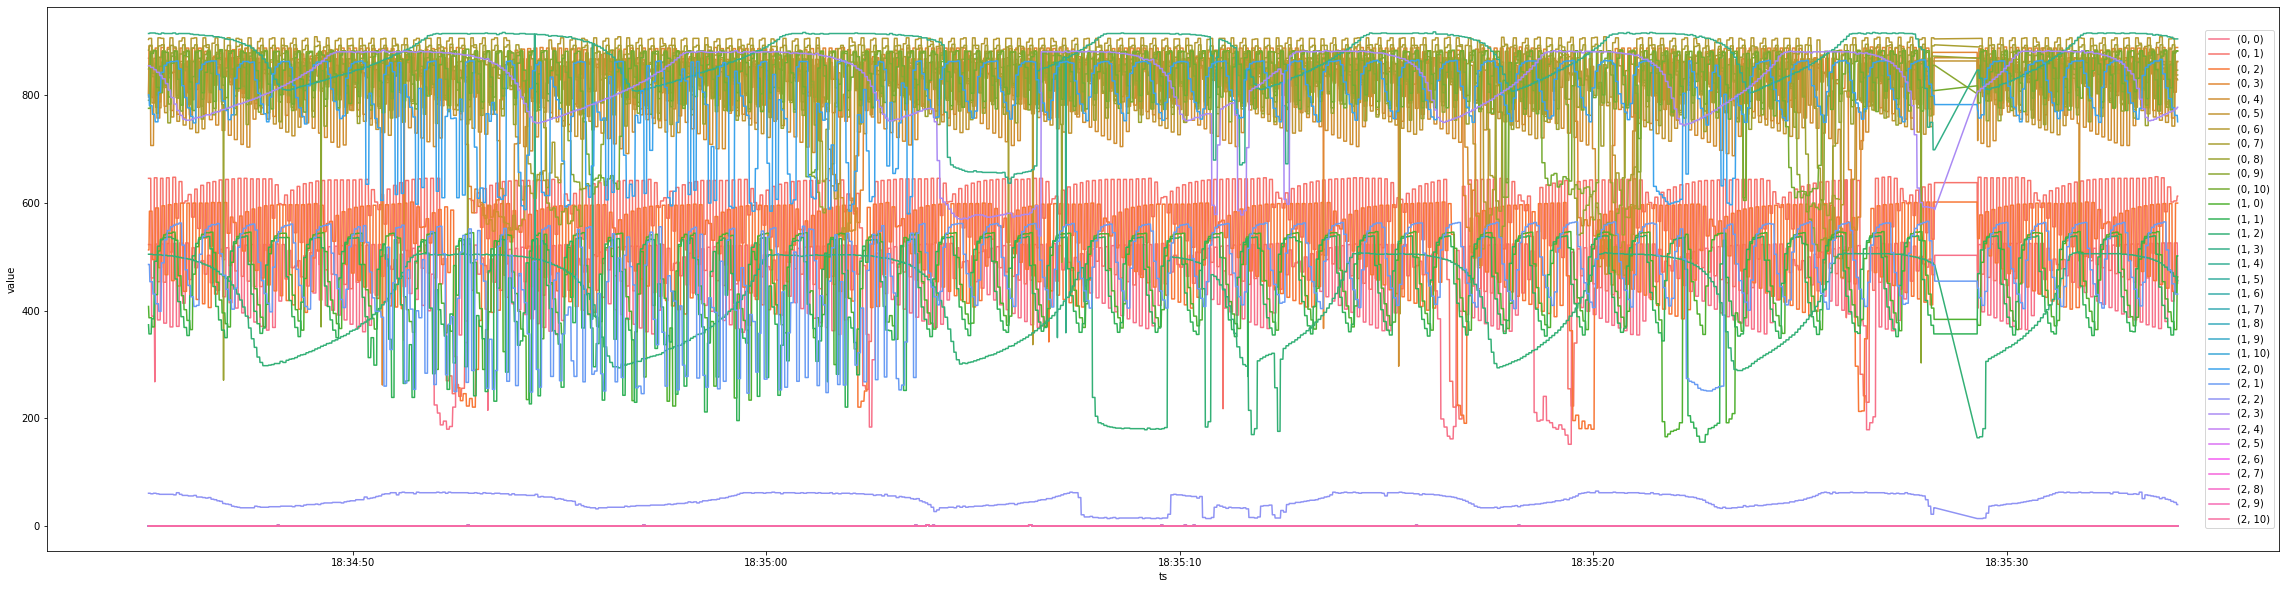

In [7]:
def plot_without_markers(df):
    fig, ax = plt.subplots(figsize=(40, 10))
    sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
    plt.legend(loc="center right")

plot_without_markers(df)

In [8]:
CREATE_MARKERS = False

In [9]:
def create_shadow_marker():
    marker = {}
    sub_markers = ['start_shadow', 'end_shadow']
    for sub_marker in sub_markers:
        print(f"Press key for '{sub_marker}'")
        input()  # just wait for any keypress
        marker[sub_marker] = datetime.now()
    return marker

In [10]:
if CREATE_MARKERS:
    markers = []

In [11]:
if CREATE_MARKERS:
    markers.append(create_shadow_marker())

In [12]:
# markers

In [13]:
def plot_with_shadow_markers(df, markers):
    color_map = {'start_shadow': 'orange', 'end_shadow': 'blue'}

    fig, ax = plt.subplots(figsize=(40, 10))
    for marker in markers:
        for sub_marker, ts in marker.items():
            ax.axvline(ts, color=color_map[sub_marker])
    sns.lineplot(ax=ax, data=df, x='ts', y='value', hue='matrix_idx')
    plt.legend(loc="center right")

In [14]:
# plot_with_shadow_markers(df, markers)

In [15]:
import sys
sys.path.append('..')
from data_preprocessor import MatrixDataPreprocessor
from utils import load_config

In [16]:
datpro = MatrixDataPreprocessor(load_config('config.yml'))

In [17]:
# matrix_start = (0,0)
# # matrix_end = (2,2)
# matrix_end = (,6)

# data_sliced = {ts: value_matrix[matrix_start[0]:matrix_end[0], matrix_start[1]:matrix_end[1]] for ts, value_matrix in data.items()}
# datpro.matrix_shape = (matrix_end[0] - matrix_start[0], matrix_end[1] - matrix_start[1])

# # this is bullshit
# # datpro.cluster_predictors = datpro.cluster_predictors[:datpro.matrix_shape[0] * datpro.matrix_shape[1]]

# print(datpro.matrix_shape)
# list(data_sliced.values())[0]

In [19]:
datpro.calibrate(values=list(data.values()))

Calibrating...
Calibration done!


In [20]:
df_normalized = transform_data_to_df({ts: datpro.normalize(value_matrix) for ts, value_matrix in data.items()})

Calibrating...


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [ ]:
df_normalized

: 

In [ ]:
df_normalized.value.hist()

: 

In [ ]:
plot_without_markers(df_normalized)


: 

In [ ]:
plot_without_markers(df[df['matrix_idx'] == '(0, 0)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 0)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 1)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 2)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 3)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(0, 5)'])

: 

In [ ]:
plot_without_markers(df[df['matrix_idx'] == '(0, 5)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(3, 2)'])

: 

In [ ]:
plot_without_markers(df[df['matrix_idx'] == '(3, 2)'])

: 

In [ ]:
plot_without_markers(df_normalized[df_normalized['matrix_idx'] == '(2, 2)'])

: 

In [ ]:
plot_without_markers(df[df['matrix_idx'] == '(2, 2)'])

: 

: 

In [ ]:
test_matrix = list(data.values())[496]

print(test_matrix)

print(datpro.normalize(test_matrix))

: 

In [ ]:
test_sensor = np.stack(list(data.values()), axis=2)[1, 0, :]

plt.plot(test_sensor)

: 

In [ ]:
any(x != 0.0 for x in list(df_normalized['value']))

: 

In [ ]:
[pred.cluster_centers_ for pred in datpro.cluster_predictors if hasattr(pred, "cluster_centers_")]

: 

: 